## Feature Selection Techniques

<hr>

### Agenda
1. Introduction to Feature Selection
2. VarianceThreshold
3. Chi-squared stats
4. ANOVA using f_classif
5. Univariate Linear Regression Tests using f_regression
6. F-score vs Mutual Information
7. Mutual Information for discrete value
8. Mutual Information for continues value
9. SelectKBest
10. SelectPercentile
11. SelectFromModel
12. Recursive Feature Elemination

<hr>

### 1. Introduction to Feature Selection
* Selecting features from the dataset
* Improve estimator's accuracy
* Boost preformance for high dimensional datsets
* Below we will discuss univariate selection methods
* Also, feature elimination method

In [1]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. VarianceThreshold
* Drop the columns whose variance is below configured level
* This method is unsupervised .i.e target not taken into action
* Intution : Columns whose values arn't petty much the same won't have much impact on target

In [2]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'],
              'B':[1,2,3,1,2,1,1,1],
              'C':[1,2,3,1,2,1,1,1]})

In [3]:
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df['A'] = le.fit_transform(df.A)

In [6]:
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [7]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [8]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [9]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

### 3. Chi-Square for Non-negative feature & class
* Feature data should be booleans or count
* Supervised technique for feature selection
* Target should be discrete

In [10]:
df = pd.read_csv('/content/tennis.csv')

In [11]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [13]:
chi2, pval = feature_selection.chi2(df.drop('play',axis=1),df.play)

In [14]:
chi2

array([2.02814815, 0.02222222, 1.4       , 0.53333333])

In [15]:
pval

array([0.15440865, 0.88149745, 0.23672357, 0.46520882])

* Higher value means more important feature for target

### 4. ANOVA using f_classif
* For feature variables continues in nature
* And, target variable discrete in nature
* Internally, this method uses ratio of variation within a columns & variation across columns

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer_data = load_breast_cancer()

In [18]:
X = cancer_data.data
Y = cancer_data.target

In [19]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
fratio, pval = feature_selection.f_classif(X,Y)

In [25]:
np.round(fratio)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

In [26]:
pval

array([8.46594057e-096, 4.05863605e-025, 8.43625104e-101, 4.73456431e-088,
       1.05185036e-018, 3.93826311e-056, 9.96655576e-084, 7.10115016e-116,
       5.73338403e-016, 7.59936804e-001, 9.73894866e-050, 8.43332029e-001,
       1.65190518e-047, 5.89552139e-046, 1.10296609e-001, 9.97599465e-013,
       8.26017617e-010, 3.07230877e-024, 8.76641818e-001, 6.30735508e-002,
       8.48229192e-116, 1.07805749e-030, 5.77139714e-119, 2.82884770e-097,
       6.57514363e-026, 7.06981635e-055, 2.46466396e-072, 1.96909971e-124,
       2.95112058e-025, 2.31643245e-015])

* Each value represents importance of a feature

### 5. Univariate Regression Test using f_regression
* Linear model for testing the individual effect of each of many regressors.
* Correlation between each value & target is calculated
* F-test captures linear dependency

In [27]:
from sklearn.datasets import fetch_california_housing

In [28]:
house_data = fetch_california_housing()

In [29]:
X,Y = house_data.data, house_data.target

In [30]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [31]:
F, pval = feature_selection.f_regression(X,Y)

In [32]:
F

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

* Columns with top F values are the selected features

### 6. F score verses Mutual Information

In [33]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [34]:
feature_selection.f_regression(X,y)

(array([187.42118421,  52.52357392,   0.47268298]),
 array([3.19286906e-39, 8.50243215e-13, 4.91915197e-01]))

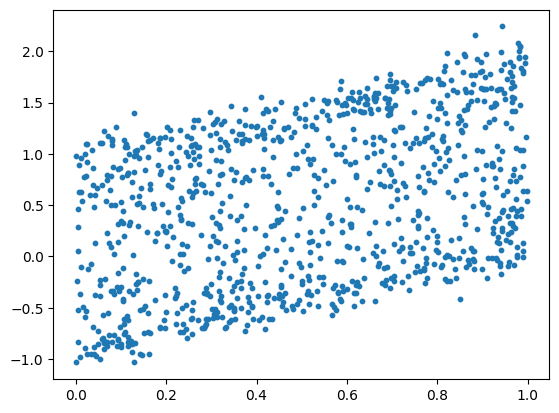

In [35]:
plt.scatter(X[:,0],y,s=10)

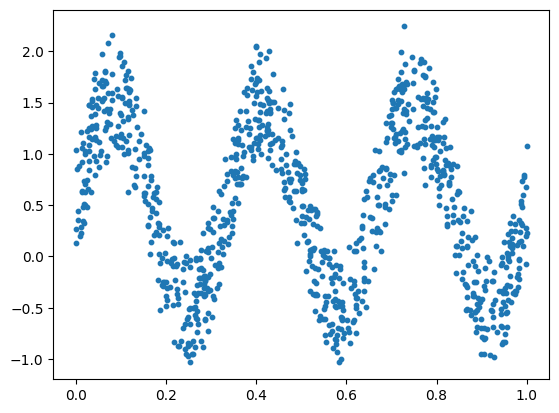

In [36]:
plt.scatter(X[:,1],y,s=10)

### 7. Mutual Information for regression using mutual_info_regression
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is continues in nature

In [37]:
feature_selection.mutual_info_regression(X,y)

array([0.31431334, 0.86235026, 0.        ])

### 8. Mutual Information for classification using mutual_info_classification
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is discrete in nature

In [38]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [39]:
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [40]:
cat_cols = list(adult_data.select_dtypes('object').columns)

In [41]:
cat_cols.remove('Salary')

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
for col in cat_cols:
    le = LabelEncoder()
    adult_data[col]  = le.fit_transform(adult_data[col])

In [44]:
adult_data.Salary = le.fit_transform(adult_data.Salary)

In [45]:
adult_data.Salary

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [46]:
feature_selection.mutual_info_classif(adult_data, adult_data.Salary)

array([0.06752232, 0.01597954, 0.03269563, 0.06815782, 0.06493744,
       0.10630121, 0.06413624, 0.11093098, 0.00713277, 0.02969038,
       0.08077943, 0.03834522, 0.03946289, 0.00994085, 0.55310155])

In [47]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

### 9. SelectKBest
* SelectKBest returns K important features based on above techniques
* Based on configuration, it can use mutual_information or ANOVA or regression based techniques

In [48]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [49]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.f_classif)

In [50]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [51]:
selector.scores_

array([1.88670731e+03, 8.69361605e+01, 2.91559359e+00, 2.06129509e+02,
       4.12009578e+03, 1.34685178e+03, 1.86500322e+02, 2.18764583e+03,
       1.68934788e+02, 1.59310791e+03, 1.70915006e+03, 7.54830452e+02,
       1.81338628e+03, 8.17155711e+00])

In [52]:
data[0]

array([  39,   13,    4,    1,    1, 2174,   40])

In [53]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)

In [54]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [55]:
selector.scores_

array([0.06704742, 0.01705685, 0.03345472, 0.06446644, 0.06492471,
       0.11393583, 0.0634702 , 0.11294401, 0.01203518, 0.02890726,
       0.07861853, 0.03601993, 0.04441492, 0.01312209])

In [56]:
data[0]

array([  39,    9,   13,    4,    1,    1, 2174])

### 10. SelectPercentile
* Selecting top features whose importances are in configured parameter
* Default is top 10 percentile

In [57]:
selector = feature_selection.SelectPercentile(percentile=60, score_func=feature_selection.mutual_info_classif)

In [58]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [59]:
selector.scores_

array([0.06676253, 0.01800584, 0.03274462, 0.06423486, 0.06553422,
       0.10821353, 0.06813398, 0.11141359, 0.0084903 , 0.02828398,
       0.08136485, 0.03712863, 0.04246622, 0.00940704])

In [60]:
data[:5]

array([[  39,    9,   13,    4,    1,    1, 2174,   40],
       [  50,    9,   13,    2,    4,    0,    0,   13],
       [  38,   11,    9,    0,    6,    1,    0,   40],
       [  53,    1,    7,    2,    6,    0,    0,   40],
       [  28,    9,   13,    2,   10,    5,    0,   40]])

### 11. SelectFromModel
* Selecting important features from model weights
* The estimator should support 'feature_importances'

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()
sfm = feature_selection.SelectFromModel(regr, threshold=0.2)

In [ ]:
updated_data = sfm.fit_transform(boston.data, boston.target)

In [ ]:
updated_data

array([[ 0.   ,  0.538,  6.575, ...,  1.   , 15.3  ,  4.98 ],
       [ 0.   ,  0.469,  6.421, ...,  2.   , 17.8  ,  9.14 ],
       [ 0.   ,  0.469,  7.185, ...,  2.   , 17.8  ,  4.03 ],
       ...,
       [ 0.   ,  0.573,  6.976, ...,  1.   , 21.   ,  5.64 ],
       [ 0.   ,  0.573,  6.794, ...,  1.   , 21.   ,  6.48 ],
       [ 0.   ,  0.573,  6.03 , ...,  1.   , 21.   ,  7.88 ]])

In [ ]:
boston.data.shape

(506, 13)

In [ ]:
updated_data.shape

(506, 7)

### 12. Recursive Feature Elimination
* Uses an external estimator to calculate weights of features
* First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.
* Then, the least important features are pruned from current set of features.
* That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [61]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=100, n_features=10, random_state=0)
lr = LinearRegression()
selector = RFE(estimator=lr, n_features_to_select=7)
data = selector.fit_transform(X, y)

In [62]:
X.shape

(100, 10)

In [63]:
data.shape

(100, 7)

In [64]:
selector.ranking_

array([1, 4, 2, 1, 1, 1, 1, 1, 3, 1])

In [65]:
data

array([[-0.5028167 , -0.96050438, -0.51751904, -0.97882986, -0.43918952,
         0.18133843,  2.41245368],
       [-0.44816536, -0.02342311, -0.93274091, -1.26306835,  0.45248909,
         0.09789615, -0.64933793],
       [-0.07466798,  0.27560067,  0.36584879,  1.29782527,  0.48111513,
         2.75935511,  0.25871644],
       [-0.31197611, -1.00683175,  1.59277075, -0.25857263,  0.30833125,
        -1.37808347, -0.8402904 ],
       [ 2.49720039,  0.56400854, -0.50535832, -0.81579154, -0.5075176 ,
        -1.0518801 , -2.24532165],
       [ 0.04513402, -0.27643285, -1.29868672,  1.27607535,  1.32501405,
         0.20533256,  2.33962481],
       [-1.42191987, -0.85654931, -0.64718143,  0.47224715,  0.9304085 ,
        -0.1753164 ,  1.99795608],
       [ 0.52894362,  0.86351966, -0.94748859,  0.24444346,  1.40134483,
        -0.41038179,  0.24614779],
       [-0.37514712,  0.1833392 ,  0.67646073, -0.38200896, -0.22425893,
        -0.30224973, -1.22619619],
       [ 0.86259601,  1.5133